<a href="https://colab.research.google.com/github/JuanCarlosZS/DataScience/blob/main/ProyectoParteIII%2BZenozain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#cargar datos
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQCPsja4wHug3G3JrwIgNBHFcRh46TEPTpLfjEgygw51eRONqHiiate1KijDbT0FsJSph0ySCOFa2Fg/pub?gid=1897966526&single=true&output=csv')
df.head()

,FECHA_CORTE,ITEM,ANIO,MES,FEDERACION,PATERNO,MATERNO,NOMBRES,PAD,NIVEL,MONTO,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_PUBLICACION
0,20241130,1,2013,201301,AJEDREZ,ALIAGA,FERNANDEZ,INGRID YADYRA,I,III,1000.0,PERU,LIMA,LIMA,JESUS MARIA,150113,20241213
1,20241130,2,2013,201301,AJEDREZ,CABALLERO,QUIJANO,MITZY MISHEL,I,V,600.0,PERU,LIMA,LIMA,LIMA,150101,20241213
2,20241130,3,2013,201301,AJEDREZ,CHUMPITAZ,CARBAJAL,ANN LINDSAY,I,III,1000.0,PERU,LIMA,LIMA,LA VICTORIA,150115,20241213
3,20241130,4,2013,201301,AJEDREZ,CORI,QUISPE,KEVIN JOEL,I,V,600.0,PERU,LIMA,LIMA,VILLA EL SALVADOR,150142,20241213
4,20241130,5,2013,201301,AJEDREZ,CRUZ,SANCHEZ,CRISTHIAN ARNALDO,I,IV,800.0,PERU,LIMA,LIMA,LIMA,150101,20241213


In [6]:
# Selección de colummnas relevantes
df_model = df[['FEDERACION', 'NIVEL', 'PAD', 'MONTO']].dropna()

In [7]:
# Definición de variables dependientes e independientes
X = df_model[['FEDERACION', 'NIVEL', 'PAD']]
y = df_model['MONTO']


In [8]:
X_vol = df_model[['FEDERACION', 'NIVEL', 'PAD']]
X_vol = pd.get_dummies(X_vol, columns=['FEDERACION', 'NIVEL', 'PAD']).astype(float)
y_vol = df_model['MONTO']

In [9]:
X_vol.head()

,FEDERACION_ACTIVIDADES SUBACUÁTICAS,FEDERACION_AJEDREZ,FEDERACION_ANPPERÚ,FEDERACION_ATLETISMO,FEDERACION_BASKETBALL,FEDERACION_BILLAR,FEDERACION_BOCHAS,FEDERACION_BOWLING,FEDERACION_BOXEO,FEDERACION_BÁDMINTON,...,FEDERACION_VELA,FEDERACION_VOLEIBOL,NIVEL_I,NIVEL_II,NIVEL_III,NIVEL_IO,NIVEL_IV,NIVEL_V,PAD_I,PAD_II
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [10]:
# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
print("Data train")
print(X_train.shape)
print(y_train.shape)

Data train
(24592, 3)
(24592,)


In [12]:
print("Data test")
print(X_test.shape)
print(y_test.shape)

Data test
(6149, 3)
(6149,)


In [13]:
# Preprocesamiento
categorical_features = ['FEDERACION', 'NIVEL', 'PAD']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)]
)

In [14]:
# Pipeline regresión lineal
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [15]:
#n Pipeline regresión de retorno

ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [16]:
# Evaluación de modelos
def evaluar_modelo(nombre, y_real, y_predicho):
    r2 = r2_score(y_real, y_predicho)
    mae = mean_absolute_error(y_real, y_predicho)
    rmse = np.sqrt(mean_squared_error(y_real, y_predicho))
    print(f"--- {nombre} ---")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}\n")
    return r2, mae, rmse

# Resultados
print("Evaluación de Modelos:")
r2_linear, mae_linear, rmse_linear = evaluar_modelo("Regresión Lineal", y_test, y_pred_linear)
r2_ridge, mae_ridge, rmse_ridge = evaluar_modelo("Regresión Ridge", y_test, y_pred_ridge)


Evaluación de Modelos:
--- Regresión Lineal ---
R² Score: 0.9528
MAE: 82.56
RMSE: 139.92

--- Regresión Ridge ---
R² Score: 0.9528
MAE: 82.64
RMSE: 139.94



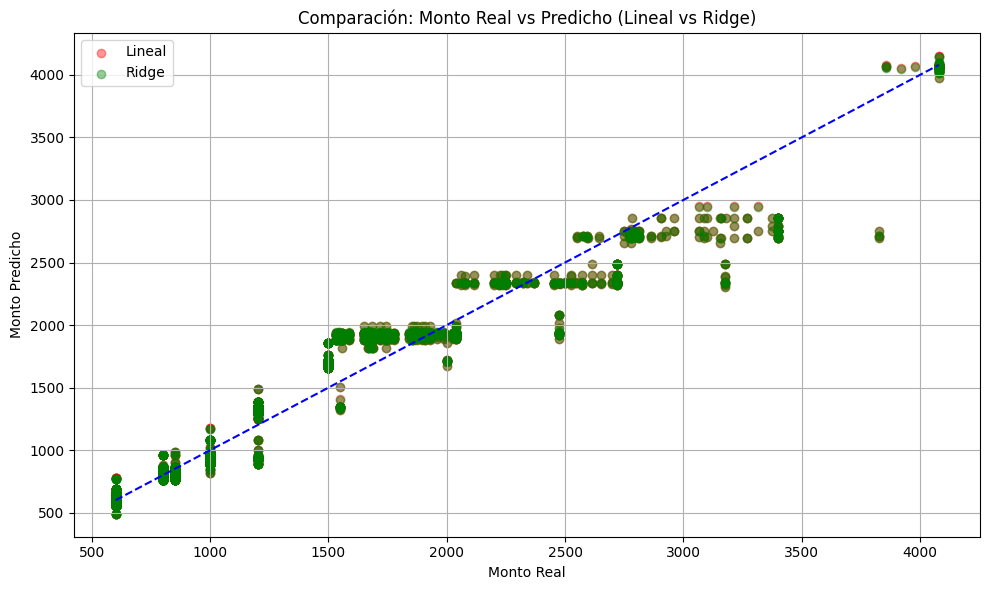

In [17]:
# Visualización

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.4, label='Lineal', color='red')
plt.scatter(y_test, y_pred_ridge, alpha=0.4, label='Ridge', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.title('Comparación: Monto Real vs Predicho (Lineal vs Ridge)')
plt.xlabel('Monto Real')
plt.ylabel('Monto Predicho')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

CONCLUSIONES:


1.   La regresión lineal tuvo un mejor desempeño en general, con un R² más alto que Ridge.

2.   Ambos modelos presentaron errores bajos (MAE y RMSE), lo que indica buena capacidad predictiva utilizando solo FEDERACION, NIVEL y PAD.

3. La gráfica muestra que los puntos están alineados cerca de la diagonal roja, lo que confirma un buen ajuste de las predicciones